### Climate Model Playbook

<p>
Mal Minhas, v0.2<br>
26.07.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 24.07.24. First version</li>
<li><b>v0.2</b>: 25.07.24. Updated with extra content on EBM with GHG</li>    
<li><b>v0.3</b>: 26.07.24. Added two layer GHG </li>    
</ul>
</p>

This is a playbook for a number of toy climate models which progressively build upon the most basic Energy Balance Model (EBM).  The work here builds upon the starting point in the [terra.do LFA (Learning for Action) course](https://www.terra.do/climate-fellowship-learning-for-action/) on climate change.  It builds upon that starting point using the open source course material provided by the University of Albany in a [series of notebooks here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb)).

### 1. Zero-Dimensional Energy Balance Model v1

A zero-dimensional **Energy Balance Model (EBM)** is a very simple toy for considering the temperature of the earth.  It considers two factors: 
1. The **energy in** which is the solar radiation (or flux) of the sun area-averaged over the surface of thea earth.  This area-average is called **insolation** or $Q$.
2. The **energy out** which is a combination of energy *reflected out* via the albedo effect which is about 30% of that incoming flux plus the energy *radiated out* by the earth as a black body.  The energy is radiated out as infrared.  Note that black body in this context has a specific definition described by the [Stefan-Boltzmann law](https://wikipedia.org/wiki/Stefan–Boltzmann_law). For a simple first level zero-dimensional model, we the earth can be considered as one: 
> For an ideal absorber/emitter or black body, the Stefan–Boltzmann law states that the total energy radiated per unit surface area per unit time (also known as the radiant exitance) is directly proportional to the fourth power of the black body's temperature, T:

$M = 𝜎T^4$

The **Absorbed Shortwave Radiation (ASR)** is the part of the incoming sunlight that is not reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.  
The **Outgoing Longwave Radiation (OLR)** is the rest of the incoming sunlight that is radiated back out into space by earth as a black body.  
The foundational principle of any simple EBM is that ASR=OLR yielding an equilibrium temperature.

This most basic form of this model is covered in more detail [in this paper](http://dimacs.rutgers.edu/archive/MPE/Energy/DIMACS-EBM.pdf) and outlined in summary in [the following YouTube video](https://www.youtube.com/watch?v=M_USJDCARrM):

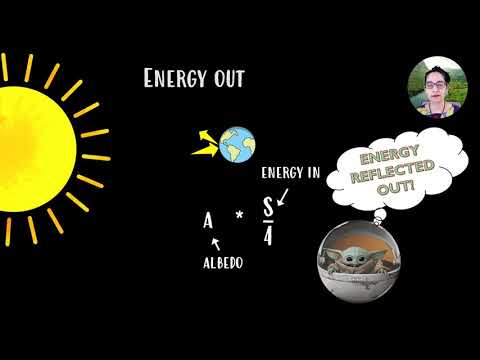

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('M_USJDCARrM', width=800, height=300)

The EBM equation is presented next along with some values.  The left hand side of the equation is energy in and the right hand side energy out which is a combination of radiated and reflected energy.  Note that $S$ is solar flux in W/m$^2$, $α$ is albedo (reflectivity of earth), $T_s$ is equilibrium temperature at the surface of the earth in Kelvins and $σ$ is the [Stefan-Boltzmann constant](https://www.techtarget.com/whatis/definition/Stefan-Boltzmann-constant) which is:
> a physical constant expressing the relationship between the heat radiation emitted by a black body and its absolute temperature that has the value
$σ = 5.670374419... ×10^{8}W / m^2K^4$

$\frac{S}{4} = σT_s^4 + α\frac{S}{4}$

or via rearrangement:

(1-α) $\frac{S}{4}$ = σ$T_s^4$

where:<br>
$α$ (albedo) = 0.30<br>
$S$ (solar flux) = 1372 W/m$^2$<br>
$σ$ (Stefan-Boltzmann constant) = 5.67x10$^{−8}$ W/m$^2$K$^4$

#### Question 1: Calculate $T_s$ in Kelvins for the given values of $α$, $S$ and $σ$

Let's use this to build an equation that solves for T$_s$ using the provided values:

In [2]:
α = 0.30
S = 1372 
σ = 5.67e-8

In [3]:
T = ((S/4 - α * S/4)/σ) ** (1./4.)
print(f"Equilibrium surface temperature T={round(T,2)}K")

Equilibrium surface temperature T=255.1K


#### Question 2: Convert $T_s$ from K to $^{o}$C

We can convert K to $^o$C as follows:

In [4]:
def kelvin_to_celsius(temp):
    celcius = temp - 273.15
    return celcius

In [5]:
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

255.1K = -18.05 degrees C


This figure is much lower than the observed temperature on earth which is around 288K.  Why the difference?  Our toy model doesn't account the presence of **greenhouse gases (GHGs)** such as CO$_2$, O$_3$ and NO$_2$ in our atmosphere.  Although they constitute only 1% of the atmosphere, they absorb 90% of the outgoing radiation and bounce it back to earth helping to keep the earth warmer than it would otherwise be. In the next section we are going to refine our toy model by adding a layer for the atmosphere.

### 2. Zero-Dimensional Energy Balance Model v2 - one layer GHG contribution 

The [University of Albany notebook here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb) provides a starting point for modelling the contribution of greenhouse gases. The basic idea is that we need to adjust our model to allow for the fact that not all the black body radiation makes it back out into space.  Some of it is absorbed within the atmosphere by greenhouse gases.  A very simple way to model that is to introduce a new **[emissivity](https://en.wikipedia.org/wiki/Emissivity)** factor, ε, that allows for variation in the efficiency of radiation of a body in the equation as illustrated next.  ε can take a value from 0 (perfect thermal reflector) to 1 (perfect thermal absorber/emitter or black body).  Note we have reordered the terms so that the right hand side is now the $ASR$ or total proportion of solar flux that is absorbed and the right hand side is $OLR$ or total terrestrial radiation emitted back into space.  A foundational rule of all EBMs is that $ASR=OLR$.

$(1- α)Q = ε \sigma T_s^4$

where:<br>
$Q$ = $\frac{S}{4}$ or **[insolation](https://simple.wikipedia.org/wiki/Insolation)**<br>
ε = **emissivity** (ranges from 0 to 1)<br>

We observe ε to be around 0.61 derived from an observed value of average surface temperature T$_s$ of 288K.  Let's plug that ε value in and recalcuate T$_s$:

In [6]:
ε = 0.61

def ASR(α, S):
    return (1-α) * S/4

def equilibrium_temperature(asr, ε, σ):
    return (asr/(ε * σ)) ** (1./4.)

T = equilibrium_temperature(ASR(α, S), ε, σ)
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

Equilibrium surface temperature T=288.65K
288.65K = 15.5 degrees C


We get the expected value but can we do better than introducing a ε fudge factor reverse-engineered from observation?  As outlined [here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb) we can model the atmosphere from first principles as a single layer under the following assumptions:
* The atmosphere is a single layer of air at temperature $T_a$
* The atmosphere is completely transparent to shortwave solar radiation.
* The surface absorbs shortwave radiation $(1-α)Q$
* The atmosphere is completely opaque to infrared radiation
* Both surface and atmosphere emit radiation as blackbodies ($\sigma T_s^4$, $\sigma T_a^4$)
* Atmosphere radiates equally up and down ($\sigma T_a^4$)
* There are no other heat transfer mechanisms

<div>
<img src="simpleGHGmodel.png" width="600"/>
</div>

Here $\sigma T_a^4$ pointing downwards constitutes the **downwelling or back radiation** from the atmosphere.  We know from energy balance that the blackbody radiation at the surface $\sigma T_s^4$ must equal the sum of the blackbody radiation in the atmosphere 2$\sigma T_a^4$.  We can use this to simplify the equilibrium energy equation at the surface as follows:

$(1- α)Q + \sigma T_a^4 = \sigma T_s^4$

where:<br>
$\sigma T_a^4 = \frac{1}{2}\sigma T_s^4$

therefore:
$(1- α)Q = \frac{1}{2} \sigma T_s^4$

Note this is exactly the same as having an ε of 0.5 which yields the expected 303K:

In [7]:
T = equilibrium_temperature(ASR(α, S), 0.5, σ)
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

Equilibrium surface temperature T=303.36K
303.36K = 30.21 degrees C


We have now overshot by some 15 $^o$C because our assumptions were not valid:
* The atmosphere does absorb some solar radiation.
* The atmosphere is NOT a perfect absorber of longwave radiation
* Absorption and emission varies strongly with wavelength and the atmosphere does not behave like a blackbody.
* Emissions are not determined by a single temperature T$_a$ but by the detailed vertical profile of air temperture.
* Energy is redistributed in the vertical by a variety of dynamical transport mechanisms (e.g. convection and boundary layer turbulence).

In the next section we are going to add a second layer for the atmosphere.

### 3. Zero-Dimensional Energy Balance Model v2 - two layer GHG contribution 

We can generalize the one layer GHG model to build a slighly more realistic model of OLR radiative transfer by doing two things:
* Introducing a second layer for the atmosphere to build a vertical structure
* Modify the behaviour of each layer so it is no longer a black body (perfect thermal absorber/emitter)

Doing so gives a very useful prototype model for understanding how the greenhouse effect works with the following assumptions:
* The atmosphere is completely transparent to shortwave radiation (still)
* We can divide the atmosphere up into two layers of equal mass (the dividing line is thus at 500 hPa pressure level)
* Each layer **absorbs only a fraction** of whatever longwave radiation is incident upon it.
* We will call this fraction ε, the absorptivity of the layer and is it the same in each layer

The result is termed the **grey gas** model in which emission and absorption have no spectral dependence.  We can consider it to be a "leaky greenhouse" on account of ε.  In order to build this model, we need to introduce one additional piece of physics known as **Kirchoff's Law** namely that at each layer *absorptivity* equals *emissibility*.  So if a layer of atmosphere at temperature $T$ absorbs a fraction ε of incident longwave radiation, it must emit $ ε \sigma T^4$ both up and down.

<div>
<img src="twoLayerGHGmodel.png" width="600"/>
</div>

Features of this model:
* Surface temperature is $T_s$
* Atmospheric temperatures are $T_0$ and $T_1$ where $T_0$ is closest to the surface.
* The absorptivity of every atmospheric layer is ε
* Surface emission is $\sigma T_s^4$
* Atmospheric layer emission is ε$\sigma T_s^4$ (up and down)
* Absorptivity = emissivity for atmospheric layers
* Only a fraction ε of the longwave beam is transmitted through each layer.

#### 3.1 Establishing constants and observed values

We will use `sympy` an open-source symbolic math library for helping build our grey gas model.  Let's start by defining some `sympy` symbols and printing one of them out:

In [8]:
import sympy
sympy.init_printing()
epsilon, T_e, T_s, T_0, T_1, sigma = sympy.symbols('epsilon, T_e, T_s, T_0, T_1, sigma', positive=True)
T_s

Tₛ

Now we can build a dictionary `v` that holds actual values for some of these symbols.  Note the value for ε derived from measurement is 0.58 and the measured values of $T_s$, $T_0$ at 500 hPa and $T_1$ are as given:

In [9]:
Q, alpha = sympy.symbols('Q, alpha', positive=True)
v = {}
v[Q] = 341.3        #  global mean insolation in W/m2
v[alpha] = 0.3      #  observed planetary albedo
v[sigma] = 5.67e-8  #  Stefan-Boltzmann constant in W/m2/K4
v[epsilon] = 0.58   #  Observed through measurement
v[T_s] = 288        #  Observed through measurement
v[T_0] = 275        #  Observed through measurement
v[T_1] = 230        #  Observed through measurement
v

{Q: 341.3, T₀: 275, T₁: 230, Tₛ: 288, α: 0.3, ε: 0.58, σ: 5.67e-08}

#### 3.2 Incoming Shortwave radiation 

Since we have assumed the atmosphere is transparent to shortwave, the incident beam passes unchanged from the top to the surface, where a fraction α is reflected upward out to space.  We can capture this in a column vector, $ASR$, where the terms are arranged in order `[surface, layer 0, layer 1]` as follows:

In [10]:
ASR = sympy.Matrix([(1-alpha)*Q, 0, 0])
ASR

⎡Q⋅(1 - α)⎤
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎣    0    ⎦

#### 3.3 Longwave Emissions

Let's denote the emissions from each layer as:

$E_s = \sigma T_s^4$<br>
$E_0 =  ε\sigma T_0^4$<br>
$E_1 =  ε\sigma T_1^4$<br>

noting that and $E_0$ and $E_1$ contribute to **both** the upwelling and downwelling beams.

Let's define these emissions using `sympy` symbols and display as a column vector, $E$, in order `[surface, layer 0, layer 1]` thus:

In [11]:
E_s = sigma*T_s**4
E_0 = epsilon*sigma*T_0**4
E_1 = epsilon*sigma*T_1**4
E = sympy.Matrix([E_s, E_0, E_1])
E

⎡   4   ⎤
⎢ Tₛ ⋅σ ⎥
⎢       ⎥
⎢  4    ⎥
⎢T₀ ⋅ε⋅σ⎥
⎢       ⎥
⎢  4    ⎥
⎣T₁ ⋅ε⋅σ⎦

#### 3.4 Upwelling beam

Let $U$ be the upwelling flux of longwave radiation from earth up to space with the layers exactly as illustrated in the diagram.  The upward flux from the surface to layer 0, ie. emission from the surface, is:

$U_0 = S_0$

with:

$U_1 = (1-ε)U_0 + E_0$<br>
$U_2 = (1-ε)U_1 + E_1$<br>

Let's build these layers using `sympy` and print out $U_2$:

In [12]:
U_0 = E_s
U_1 = (1-epsilon)*U_0 + E_0
U_2 = (1-epsilon)*U_1 + E_1
U_2

  4               ⎛  4         4          ⎞
T₁ ⋅ε⋅σ + (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠

The three  $U_2$ terms for $T_s$, $T_0$ and $T_1$ in this expression represent the **contributions to the total OLR that originate from each of the three levels**.  Let's code them into `sympy` again and print out their sum:

In [13]:
#  Define the contributions to OLR originating from each level
OLR_s = (1-epsilon)**2 *sigma*T_s**4
OLR_0 = epsilon*(1-epsilon)*sigma*T_0**4
OLR_1 = epsilon*sigma*T_1**4

OLR = OLR_s + OLR_0 + OLR_1

print(f"The expression for OLR is:")
OLR

The expression for OLR is:


  4                 4         4          2
T₀ ⋅ε⋅σ⋅(1 - ε) + T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε) 

Let's have a look at these OLR terms in a column vector in order `[surface, layer 0, layer 1]`:

In [14]:
OLRterms = sympy.Matrix([OLR_s, OLR_0, OLR_1])
OLRterms

⎡  4          2 ⎤
⎢Tₛ ⋅σ⋅(1 - ε)  ⎥
⎢               ⎥
⎢  4            ⎥
⎢T₀ ⋅ε⋅σ⋅(1 - ε)⎥
⎢               ⎥
⎢      4        ⎥
⎣    T₁ ⋅ε⋅σ    ⎦

We can now stack these upwelling values in a column vector, $U$, again in the order `[surface, layer 0, layer 1]`:

In [15]:
U = sympy.Matrix([U_0, U_1, U_2])
U

⎡                     4                     ⎤
⎢                   Tₛ ⋅σ                   ⎥
⎢                                           ⎥
⎢            4         4                    ⎥
⎢          T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)          ⎥
⎢                                           ⎥
⎢  4               ⎛  4         4          ⎞⎥
⎣T₁ ⋅ε⋅σ + (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦

#### 3.5 Downwelling beam

Let $D$ be the downwelling longwave beam as shown in the diagram.  There is no longwave radiation coming in from space so we begin with:

$D_2$ = 0

Between layer 1 and layer 0 the beam contains emissions from layer 1:

$D_1$ = (1-ε)$D_2$ + $E_1$

Between layer 0 and the surface the beam contains a transmitted component and the emissions from layer 0:

$D_0$ = (1-ε)$D_1$ + $E_0$

This $D_0$ constitutes **back radiation**, namely the longwave radiation from the atmosphere back down to the surface.  We can build these values as follows:

In [16]:
fromspace = 0
D_2 = fromspace
D_1 = (1-epsilon)*D_2 + E_1
D_0 = (1-epsilon)*D_1 + E_0
D_0

  4         4            
T₀ ⋅ε⋅σ + T₁ ⋅ε⋅σ⋅(1 - ε)

Let's code this stack up in a column vector $D$ using `sympy` once more in order `[surface, layer 0, layer 1]`:

In [17]:
D = sympy.Matrix([D_0, D_1, D_2])
D

⎡  4         4            ⎤
⎢T₀ ⋅ε⋅σ + T₁ ⋅ε⋅σ⋅(1 - ε)⎥
⎢                         ⎥
⎢           4             ⎥
⎢         T₁ ⋅ε⋅σ         ⎥
⎢                         ⎥
⎣            0            ⎦

#### 3.6 Solving for $T_s$, $T_0$ and $T_1$

Now we have all the elements we need to solve a set of equations for $T_s$, $T_0$ and $T_1$.  Our atmosphere is not isothermal.  These temperatures drop as you go through the layers from the surface of earth to the top of the atmosphere (TOA) according to the **[lapse rate](https://en.wikipedia.org/wiki/Lapse_rate)**:
> The lapse rate is the rate at which an atmospheric variable, normally temperature in Earth's atmosphere, falls with altitude. Lapse rate arises from the word lapse, in the sense of a gradual fall.

It turns out that lots of different physical processes contribute to setting the lapse rate.  Understanding how these processes acts together and how they change as the climate changes is one of the key reasons for which we need more complex climate models. For now, we will use our toy greenhouse model to do the most basic lapse rate calculation which is the **radiative equilibrium temperature** which assumes that:
* the only exchange of energy between layers is longwave radiation
* equilibrium is achieved when the net radiative flux convergence in each layer is zero.

First, the **net upwelling flux** $F$ is just the difference between flux up and flux down:

In [18]:
F = U-D
F

⎡        4         4                 4      ⎤
⎢    - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥
⎢                                           ⎥
⎢       4         4         4               ⎥
⎢     T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)     ⎥
⎢                                           ⎥
⎢  4               ⎛  4         4          ⎞⎥
⎣T₁ ⋅ε⋅σ + (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦

**Net absorption** is the flux convergence in each layer.  In other words the difference between what's coming in the bottom and what's going out the top of each layer.

In [19]:
# define a vector of absorbed radiation which is the same size as emissions
A = E.copy()
#  absorbed radiation at surface
A[0] = F[0]
# Compute the convergence
for n in range(2):
    A[n+1] = -(F[n+1]-F[n])

Radiative equilibrium means **net absorption is zero** in the atmosphere.  The only other heat source is the incoming shortwave heating at the surface.  Putting that together as an equation yields the following equation for radiative equilibrium or `radeq`:

In [20]:
radeq = sympy.Equality(A, ASR)
radeq

⎡                      4         4                 4                    ⎤      ↪
⎢                  - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ                  ⎥      ↪
⎢                                                                       ⎥   ⎡Q ↪
⎢          4         4                 4         4               4      ⎥   ⎢  ↪
⎢    - 2⋅T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + T₁ ⋅ε⋅σ - Tₛ ⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥ = ⎢  ↪
⎢                                                                       ⎥   ⎢  ↪
⎢  4           4         4                     ⎛  4         4          ⎞⎥   ⎣  ↪
⎣T₀ ⋅ε⋅σ - 2⋅T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε) - (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦      ↪

↪          
↪          
↪ ⋅(1 - α)⎤
↪         ⎥
↪    0    ⎥
↪         ⎥
↪    0    ⎦
↪          

Just as we did for the 1-layer model, it is helpful to rewrite this system using the definition of the **emission temperture** $T_e$:

$(1- α)Q = \sigma T_e^4$

In [21]:
radeq2 = radeq.subs([((1-alpha)*Q, sigma*T_e**4)])
radeq2

⎡                      4         4                 4                    ⎤      ↪
⎢                  - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ                  ⎥   ⎡  ↪
⎢                                                                       ⎥   ⎢T ↪
⎢          4         4                 4         4               4      ⎥   ⎢  ↪
⎢    - 2⋅T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + T₁ ⋅ε⋅σ - Tₛ ⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥ = ⎢  ↪
⎢                                                                       ⎥   ⎢  ↪
⎢  4           4         4                     ⎛  4         4          ⎞⎥   ⎣  ↪
⎣T₀ ⋅ε⋅σ - 2⋅T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε) - (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦      ↪

↪      
↪  4  ⎤
↪ ₑ ⋅σ⎥
↪     ⎥
↪  0  ⎥
↪     ⎥
↪  0  ⎦
↪      

In this form we can see that we actually have a linear system of equations for a set of variables 
$T_s^4$, $T_0^4$, $T_1^4$.  We can solve this matrix problem to get these as functions of $T_e^4$.  The following produces a dictionary of solutions for the fourth power of the temperatures.

In [22]:
# Solve for radiative equilibrium 
fourthpower = sympy.solve(radeq2, [T_s**4, T_1**4, T_0**4])
fourthpower

⎧         4       4          4            4         4⎫
⎪  4  - Tₑ ⋅ε - Tₑ     4  -Tₑ      4  - Tₑ ⋅ε - 2⋅Tₑ ⎪
⎨T₀ : ─────────────, T₁ : ─────, Tₛ : ───────────────⎬
⎪         ε - 2           ε - 2            ε - 2     ⎪
⎩                                                    ⎭

A little manipulation gets us the solutions for temperatures that we want:

In [23]:
# need the symbolic fourth root operation
from sympy.simplify.simplify import nthroot

fourthpower_list = [fourthpower[key] for key in [T_s**4, T_0**4, T_1**4]]
solution = sympy.Matrix([nthroot(item,4) for item in fourthpower_list])
#  Display result as matrix equation!
T = sympy.Matrix([T_s, T_0, T_1])
sympy.Equality(T, solution)

       ⎡     _________________⎤
       ⎢    ╱     4         4 ⎥
       ⎢   ╱  - Tₑ ⋅ε - 2⋅Tₑ  ⎥
       ⎢4 ╱   ─────────────── ⎥
       ⎢╲╱         ε - 2      ⎥
       ⎢                      ⎥
⎡Tₛ⎤   ⎢      _______________ ⎥
⎢  ⎥   ⎢     ╱     4       4  ⎥
⎢T₀⎥ = ⎢    ╱  - Tₑ ⋅ε - Tₑ   ⎥
⎢  ⎥   ⎢ 4 ╱   ─────────────  ⎥
⎣T₁⎦   ⎢ ╲╱        ε - 2      ⎥
       ⎢                      ⎥
       ⎢           _______    ⎥
       ⎢          ╱  -1       ⎥
       ⎢    Tₑ⋅4 ╱  ─────     ⎥
       ⎣       ╲╱   ε - 2     ⎦

Plugging in the value of ε allows us to get the solutions in terms of $T_e$:

In [24]:
Tsolution = solution.subs(v)
#  Display result as matrix equation
sympy.Equality(T, Tsolution)

⎡Tₛ⎤   ⎡1.16100165920293⋅Tₑ ⎤
⎢  ⎥   ⎢                    ⎥
⎢T₀⎥ = ⎢1.02705141589558⋅Tₑ ⎥
⎢  ⎥   ⎢                    ⎥
⎣T₁⎦   ⎣0.916068424462217⋅Tₑ⎦

Now we just need to know the Earth's emission temperature $T_e$ which is measured as 255K:

In [25]:
Te_value = 255

#  Output 4 significant digits
Trad = sympy.N(Tsolution.subs([(T_e, Te_value)]), 4)
sympy.Equality(T, Trad)

⎡Tₛ⎤   ⎡296.1⎤
⎢  ⎥   ⎢     ⎥
⎢T₀⎥ = ⎢261.9⎥
⎢  ⎥   ⎢     ⎥
⎣T₁⎦   ⎣233.6⎦

Let's compare this with what we observe which was plugged into `v` earlier:

In [26]:
sympy.Equality(T, T.subs(v))

⎡Tₛ⎤   ⎡288⎤
⎢  ⎥   ⎢   ⎥
⎢T₀⎥ = ⎢275⎥
⎢  ⎥   ⎢   ⎥
⎣T₁⎦   ⎣230⎦

We observe that the radiative equilibrium solution is substantially warmer at the surface and colder in the lower troposphere than reality. This is a general feature of radiative equilibrium so using it as the basis for our greenhouse model is not a complete picture.  We will need to refine our model to get closer to the observed lapse rate value for atmospheric temperature.

### 4. Radiative Forcing

The next stage will involve looking at the modelling **radiative forcing** defined as:

```Radiative forcing = Incoming Energy – Outgoing Energy```

"Radiative forcing" is the change in radiative flux at TOA after adding absorbers.  When incoming energy gets trapped and cannot all escape as outgoing energy, there is an increase in radiative forcing. That is intensifying as levels of CO2 and other greenhouse gases increase, resulting in Earth's average temperature rising.  Radiative forcing is also known as "[climate forcing](https://www.climate.gov/maps-data/climate-data-primer/predicting-climate/climate-forcing )".  Think of it as the force driving up temperatures.  The degree of radiative forcing (change in OLR) depends on the lapse rate.  To model the impact of this, we add a delta to the OLR values.  The greenhouse effect gets stronger, and energy will begin to accumulate in the system which will eventually cause temperatures to increase as the system adjusts to a new equilibrium.

**Climate sensitivity** is the average change in global mean surface temperature in response to a radiative forcing. There are three chief types of climate sensitivity: 
* The "equilibrium climate sensitivity" (ECS) is the long-term increase in global average temperature we expect to reach once the effects of a doubled CO2 concentration have had time to reach a steady state.
* The shorter-term "transient climate response" (TCR) reveals how much warmer the Earth is expected to get at that time when we double the concentration of CO2 compared to pre-industrial levels—around 280ppm. 
* The “Earth system sensitivity” (ESS) includes very long-term Earth system feedbacks, such as changes in ice sheets or in the distribution of vegetative cover.

Climate sensitivity has long been "the key uncertainty in projections of future climate change."


### 5. Dynamic Evolution through feedback

Lots of refinements are possible to a zero-dimensional EBM to model for dynamic change through feedback.  See [this lecture](https://florianboergel.github.io/climateoftheocean/2020-11-11-energy-model.html) for more detail on ways to do this.